In [150]:
# import lib
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
#import sweetviz as sv
#import missingno as msno
from sklearn import metrics
from sklearn.utils import shuffle

In [151]:
# reading dataset 
df = pd.read_csv('data.csv')
# Reading first five rows of our dataset 
df.head()

,crop,moisture,temp,pump
0,cotton,638,16,1
1,cotton,522,18,1
2,cotton,741,22,1
3,cotton,798,32,1
4,cotton,690,28,1


In [152]:
df = df.sample(frac = 1)

In [153]:
#print("\nShuffled DataFrame:")
#print(df)

In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 14 to 140
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   crop      200 non-null    object
 1   moisture  200 non-null    int64 
 2   temp      200 non-null    int64 
 3   pump      200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [155]:
df.shape

(200, 4)

In [156]:
df.isnull().sum()

crop        0
moisture    0
temp        0
pump        0
dtype: int64

In [157]:
df.describe()

,moisture,temp,pump
count,200.000000,200.000000,200.000000
mean,633.085000,27.750000,0.750000
std,279.077118,10.869602,0.434099
min,4.000000,10.000000,0.000000
25%,500.500000,18.000000,0.750000
50%,693.500000,28.000000,1.000000
75%,850.750000,38.000000,1.000000
max,1022.000000,45.000000,1.000000


In [158]:
#df["pump"]=df["pump"].replace({'No': 0, 'Yes': 1})
#df

In [159]:
# checking values are converted in 0 and 1 or not 
#print(df.pump)

In [160]:
f, t = np.bincount(df['pump'])
total = f + t
print('Examples:\n    Total: {}\n    True: {}\n    False {}'.format(total, f, t))

Examples:
    Total: 200
    True: 50
    False 150


In [161]:
numerical_feature = [feature for feature in df.columns if df[feature].dtypes != 'O']
print("Numerical Features Count {}".format(len(numerical_feature)))

discrete_feature=[feature for feature in numerical_feature if len(df[feature].unique())<25]
continuous_feature = [feature for feature in numerical_feature if feature not in discrete_feature]
print("Discrete feature Count {}".format(len(discrete_feature)))
print("Continuous feature Count {}".format(len(continuous_feature)))

Numerical Features Count 3
Discrete feature Count 1
Continuous feature Count 2


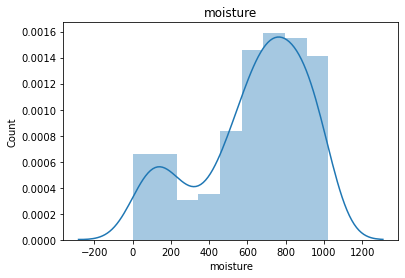

<Figure size 1080x1080 with 0 Axes>

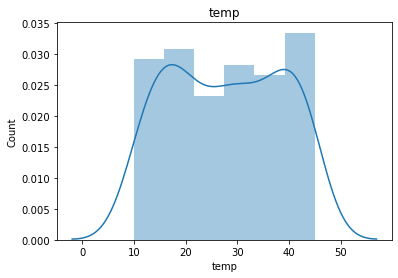

<Figure size 1080x1080 with 0 Axes>

In [162]:
# visualize 
for feature in continuous_feature:
    data=df.copy()
    sns.distplot(df[feature])
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.figure(figsize=(15,15))
    plt.show()

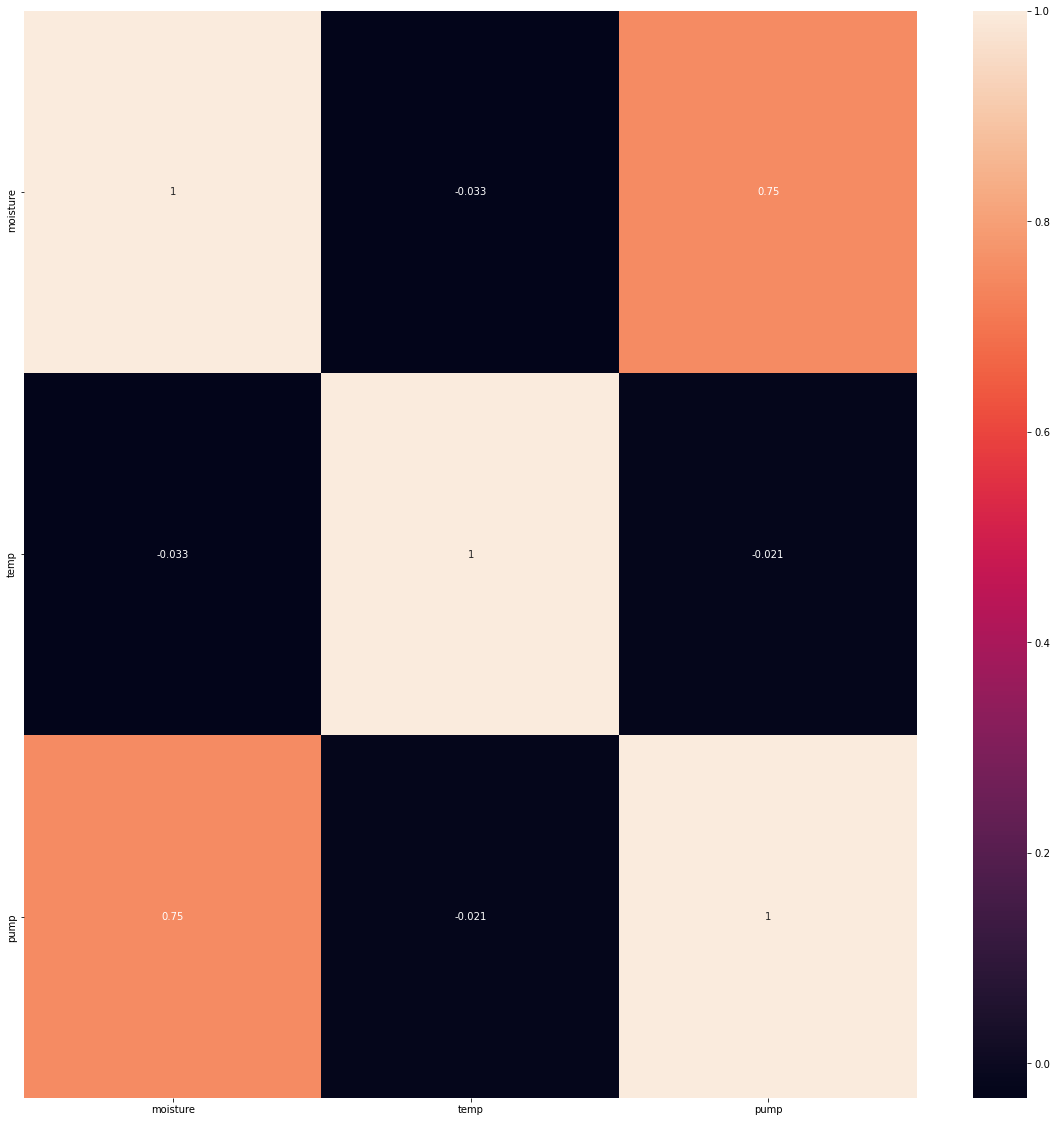

In [163]:
corrmat = df.corr(method = "spearman")
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(corrmat,annot=True)

In [164]:
X = df.drop(["pump","crop"], axis=1)
Y = df["pump"]

In [165]:
# Spliting data into training and testing 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size =0.2, random_state = 42, shuffle=True)

In [166]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, f1_score
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [167]:
model.fit(X_train, y_train) # training step 

LogisticRegression()

In [168]:
y_pred = model.predict(X_test)

In [169]:
print(y_pred)

[1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1]


In [170]:
##print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

1.0
[[ 7  0]
 [ 0 33]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00        33

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [171]:
X

,moisture,temp
14,703,45
175,1010,10
36,665,32
4,690,28
182,878,29
...,...,...
190,1021,22
135,302,23
61,729,41
138,4,42


In [172]:
# Define simple neural network model
# Keras

from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam,RMSprop
import tensorflow as tf

model = Sequential()
model.add(Dense(216, input_dim=2, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 216)               648       
_________________________________________________________________
dense_13 (Dense)             (None, 32)                6944      
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 33        
Total params: 7,625
Trainable params: 7,625
Non-trainable params: 0
_________________________________________________________________


In [173]:
callback = tf.keras.callbacks.ModelCheckpoint(filepath='best_model.h5',monitor='val_acc', mode='max',verbose=1)
es = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10)


In [174]:
# Compile the Neural network
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit to training data
#history = model.fit(X_train, y_train, epochs=100,validation_split=0.2, callbacks=[callback , es])
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test,y_test), callbacks=[callback , es])

Epoch 1/100
5/5 [==============================] - 1s 54ms/step - loss: 27.0876 - accuracy: 0.4250 - val_loss: 3.0664 - val_accuracy: 0.8250

Epoch 00001: saving model to best_model.h5
Epoch 2/100
5/5 [==============================] - 0s 18ms/step - loss: 5.9322 - accuracy: 0.7312 - val_loss: 4.2631 - val_accuracy: 0.8250

Epoch 00002: saving model to best_model.h5
Epoch 3/100
5/5 [==============================] - 0s 12ms/step - loss: 6.3706 - accuracy: 0.7375 - val_loss: 3.4817 - val_accuracy: 0.8250

Epoch 00003: saving model to best_model.h5
Epoch 4/100
5/5 [==============================] - 0s 13ms/step - loss: 4.3066 - accuracy: 0.7375 - val_loss: 1.6112 - val_accuracy: 0.8250

Epoch 00004: saving model to best_model.h5
Epoch 5/100
5/5 [==============================] - 0s 9ms/step - loss: 1.9333 - accuracy: 0.6938 - val_loss: 2.8215 - val_accuracy: 0.1750

Epoch 00005: saving model to best_model.h5
Epoch 6/100
5/5 [==============================] - 0s 15ms/step - loss: 1.6661 -

5/5 [==============================] - 0s 16ms/step - loss: 0.2042 - accuracy: 0.9062 - val_loss: 0.0998 - val_accuracy: 1.0000

Epoch 00045: saving model to best_model.h5
Epoch 46/100
5/5 [==============================] - 0s 13ms/step - loss: 0.2221 - accuracy: 0.9062 - val_loss: 0.0601 - val_accuracy: 1.0000

Epoch 00046: saving model to best_model.h5
Epoch 47/100
5/5 [==============================] - 0s 9ms/step - loss: 0.2100 - accuracy: 0.9000 - val_loss: 0.0585 - val_accuracy: 1.0000

Epoch 00047: saving model to best_model.h5
Epoch 48/100
5/5 [==============================] - 0s 10ms/step - loss: 0.2235 - accuracy: 0.9000 - val_loss: 0.0448 - val_accuracy: 0.9750

Epoch 00048: saving model to best_model.h5
Epoch 49/100
5/5 [==============================] - 0s 19ms/step - loss: 0.2089 - accuracy: 0.9187 - val_loss: 0.0629 - val_accuracy: 1.0000

Epoch 00049: saving model to best_model.h5
Epoch 50/100
5/5 [==============================] - 0s 10ms/step - loss: 0.2279 - accurac

In [175]:
loss, acc = model.evaluate(X_test, y_test, verbose=2)

2/2 - 0s - loss: 0.0473 - accuracy: 0.9750


In [176]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = model.predict(X_test)
y_pred= np.round_(y_pred)
model_accuracy = accuracy_score(y_test, y_pred)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 6  1]
 [ 0 33]]
              precision    recall  f1-score   support

           0       1.00      0.86      0.92         7
           1       0.97      1.00      0.99        33

    accuracy                           0.97        40
   macro avg       0.99      0.93      0.95        40
weighted avg       0.98      0.97      0.97        40



In [179]:
model.save("soil_moisture_97.h5")
print("model saved")

model saved


In [180]:
df

,crop,moisture,temp,pump
14,cotton,703,45,1
175,cotton,1010,10,1
36,cotton,665,32,1
4,cotton,690,28,1
182,cotton,878,29,1
...,...,...,...,...
190,cotton,1021,22,1
135,cotton,302,23,0
61,cotton,729,41,1
138,cotton,4,42,0
